# Human-like movement of EMG decoder
1. Train a network that recognizes human-like movement in trajectories.  
2. Use this model to optimize policy

## Train human-like detector
- Smoothen trajectories for training?
- Normalize per DOF (0 mean, std 1) before training

In [7]:
import pickle
from pathlib import Path
import numpy as np
import ast
from datetime import datetime

In [2]:
dataset_path = Path('datasets/longterm_dataset_3DC/')

person_path = dataset_path / 'Participant0' / 'Evaluation0'

arm_positions_pkl = 'arm_positions.pickle'
position_txt = ['participant_positions.txt', 'ring_positions.txt', 'participant_neutral_position.txt']

In [3]:
with open(person_path / arm_positions_pkl, 'rb') as f:
    arm_positions = pickle.load(f)

In [4]:
def load_txt_to_array(txt_filename):
    with open(txt_filename, 'rb') as f:
        positions = f.read()

    pos_str_list = positions.decode().split('\n')
    pos_list = [np.array(ast.literal_eval(x), dtype=float) for x in pos_str_list if len(x) > 0]
    return np.vstack(pos_list)

def load_timestamps(txt_filename):
    with open(person_path / 'timestamps.txt', 'rb') as f:
        positions = f.read()
    return positions.decode().split('\n')

In [5]:
ring_pos_array = load_txt_to_array(person_path / 'ring_positions.txt')
participant_pos_array = load_txt_to_array(person_path / 'participant_positions.txt')
participant_neutral_pos = load_txt_to_array(person_path / 'participant_neutral_position.txt')
timestamps = load_timestamps(person_path / 'timestamps.txt')

In [17]:
wrist_pos_array = np.vstack([a_pos['wristPosition'] for a_pos in arm_positions])
elbow_pos_array = np.vstack([a_pos['elbowPosition'] for a_pos in arm_positions])
arm_timestamps = np.vstack([a_pos['timestamp'] for a_pos in arm_positions])

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
def plot_3d(pos_array):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = pos_array[:, 0]
    y = pos_array[:, 1]
    z = pos_array[:, 2]
    ax.plot(x, y, z)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Trajectory Plot')
    plt.show()

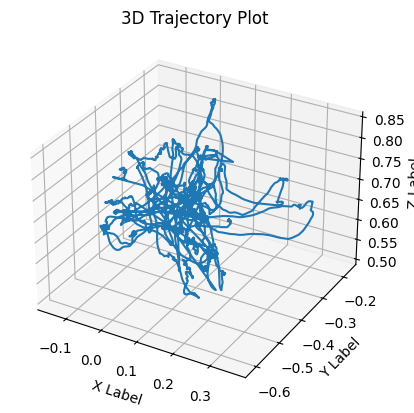

In [25]:
plot_3d(wrist_pos_array)

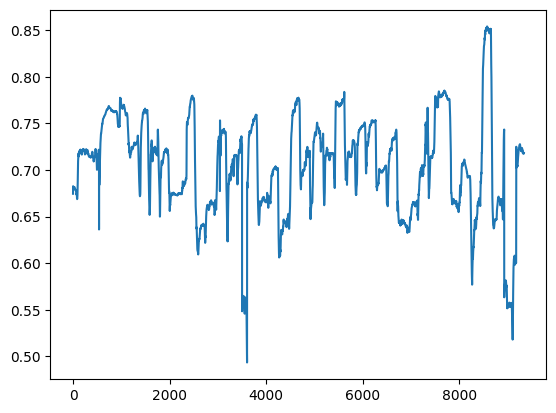

In [38]:
y = wrist_pos_array[:,2]
x = np.arange(y.shape[0])
plt.plot(x, y)

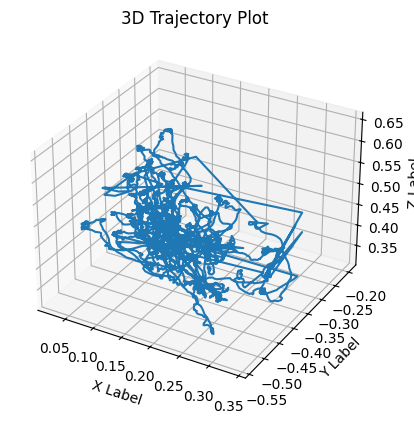

In [26]:
plot_3d(elbow_pos_array)

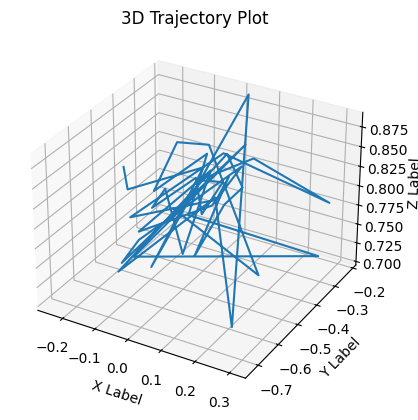

In [27]:
plot_3d(ring_pos_array)

In [8]:
timestamp_str1 = '1970-01-01 18:20:20.056'
timestamp_str2 = '1970-01-01 18:23:50.794'

# Parse timestamp strings into datetime objects
timestamp1 = datetime.strptime(timestamp_str1, '%Y-%m-%d %H:%M:%S.%f')
timestamp2 = datetime.strptime(timestamp_str2, '%Y-%m-%d %H:%M:%S.%f')

# Calculate the time difference
time_difference = timestamp2 - timestamp1

# Extract days, seconds, and microseconds from the time difference
days = time_difference.days
seconds = time_difference.seconds
microseconds = time_difference.microseconds

# Calculate the total seconds
total_seconds = days * 24 * 3600 + seconds + microseconds / 1e6

print(f"Time difference: {days} days, {total_seconds} seconds")

Time difference: 0 days, 210.738 seconds


In [9]:
timestamp1 = datetime.strptime(timestamps[0], '%Y-%m-%d %H:%M:%S.%f')
timestamp2 = datetime.strptime(timestamps[-2], '%Y-%m-%d %H:%M:%S.%f')

# Calculate the time difference
time_difference = timestamp2 - timestamp1

# Extract days, seconds, and microseconds from the time difference
days = time_difference.days
seconds = time_difference.seconds
microseconds = time_difference.microseconds

# Calculate the total seconds
total_seconds = days * 24 * 3600 + seconds + microseconds / 1e6

print(f"Time difference: {days} days, {total_seconds} seconds")

Time difference: 0 days, 206.324 seconds
